In [2]:
import sys
!{sys.executable} -m pip install astropy
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scipy
import scipy.stats as stats
from scipy import optimize
from astropy.io import fits
from astropy.table import Table
from scipy import interpolate
%matplotlib inline
from matplotlib.patches import Rectangle


np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision = 40, suppress = True)

In [26]:
Darwin_Sample = fits.open('/Users/edm/Desktop/MSA_Table_HW3')
Darwin_Sample2 = Table(Darwin_Sample[1].data)

In [27]:
Darwin_Sample2

Mass,log(L),Teff,Per,up,fl,log(nd/nH),dM/dt,uinf,agr,fSi,gtd
float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32
0.75,3.1,2200,130,4.0,2.0,-14.5,2.87e-08,0.5,0.49,0.56,498.9
0.75,3.1,2200,130,3.0,2.0,-14.5,3.64e-08,1.2,0.49,0.57,498.8
0.75,3.1,2200,130,2.0,2.0,-14.5,3.74e-08,2.1,0.49,0.57,494.7
0.75,3.1,2300,130,2.0,2.0,-14.5,2.55e-08,1.4,0.48,0.56,506.3
0.75,3.1,2300,130,3.0,2.0,-14.5,2.1e-08,0.7,0.48,0.56,507.7
0.75,3.25,2200,168,3.0,2.0,-14.5,2.07e-07,4.3,0.44,0.43,662.6
0.75,3.25,2200,168,2.0,2.0,-15.0,1.04e-07,2.9,0.63,0.42,669.8
0.75,3.25,2200,168,4.0,2.0,-15.0,1.31e-07,1.5,0.63,0.41,683.8
0.75,3.25,2200,168,4.0,2.0,-14.5,2.35e-07,3.6,0.44,0.42,669.9


In [28]:
Darwin_Sample2.colnames

['Mass',
 'log(L)',
 'Teff',
 'Per',
 'up',
 'fl',
 'log(nd/nH)',
 'dM/dt',
 'uinf',
 'agr',
 'fSi',
 'gtd']

In [16]:
#D is short hand for darwin
D_Massrate = np.asarray(Darwin_Sample2["dM/dt"])
D_Luminosity = np.asarray(Darwin_Sample2["log(L)"])
D_Teff = np.asarray(Darwin_Sample2["Teff"])
D_Mass = np.asarray(Darwin_Sample2["Mass"])

In [34]:
D_Luminosity

array([3.1 , 3.1 , 3.1 , 3.1 , 3.1 , 3.25, 3.25, 3.25, 3.25, 3.25, 3.25,
       3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25,
       3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25,
       3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25,
       3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25, 3.25,
       3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 ,
       3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 ,
       3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 ,
       3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 ,
       3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 ,
       3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 ,
       3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 ,
       3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 ,
       3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.4 , 3.

In [70]:
L = 10**D_Luminosity

In [71]:
L_sun = L*3.86*10**26

In [128]:
radius = np.sqrt((6.67e-11*D_Mass)/9.81)

In [129]:
radius[50]

2.2581823e-06

In [130]:
len(radius)

2120

In [131]:
len(D_Luminosity)

2120

In [132]:
Massrate_reimer=(4e-13)*(5.7)*(D_Luminosity/(3.846e26))*(radius/696340000)*(1.98e30/D_Mass)

(array([ 10.,  37.,  30.,  77.,  58., 166., 121., 108., 251., 180., 238.,
         34., 167., 185., 207., 179.,  72.]),
 array([-50.64191179693547 , -50.60338674461435 , -50.56486169229322 ,
        -50.5263366399721  , -50.48781158765098 , -50.449286535329854,
        -50.410761483008734, -50.372236430687614, -50.33371137836649 ,
        -50.29518632604537 , -50.25666127372424 , -50.21813622140312 ,
        -50.179611169082   , -50.141086116760874, -50.102561064439755,
        -50.064036012118635, -50.02551095979751 , -49.98698590747639 ]),
 <BarContainer object of 17 artists>)

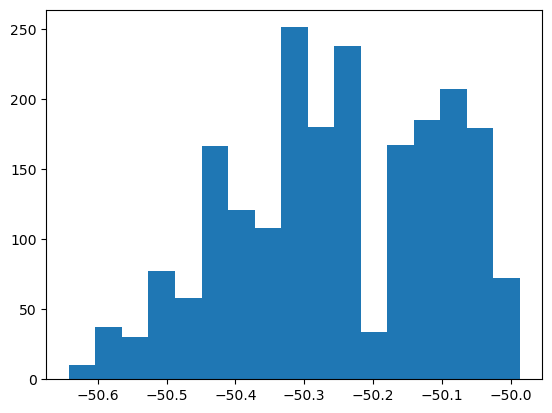

In [141]:
plt.hist(np.log(Massrate_reimer), bins = 'auto')

(array([  3.,   5.,  16.,  22.,  30.,  33.,  59.,  34.,  73.,  55.,  66.,
         68.,  77., 120., 119., 133., 188., 174., 244., 170., 132., 135.,
         78.,  44.,  30.,  12.]),
 array([-18.221830368041992, -17.885038375854492, -17.548246383666992,
        -17.211454391479492, -16.874662399291992, -16.53786849975586 ,
        -16.20107650756836 , -15.86428451538086 , -15.52749252319336 ,
        -15.19070053100586 , -14.85390853881836 , -14.517115592956543,
        -14.180323600769043, -13.843531608581543, -13.506739616394043,
        -13.169947624206543, -12.833154678344727, -12.496362686157227,
        -12.159570693969727, -11.822778701782227, -11.48598575592041 ,
        -11.14919376373291 , -10.81240177154541 , -10.47560977935791 ,
        -10.138816833496094,  -9.802024841308594,  -9.465232849121094]),
 <BarContainer object of 26 artists>)

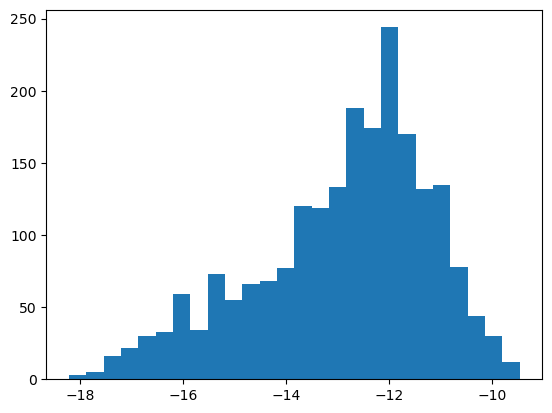

In [108]:
plt.hist(np.log(D_Massrate), bins = 'auto')

In [138]:
van_mass = -5.64 + (1.05*np.log(D_Luminosity/(10000*(3.846e26))))+(-6.3*np.log(D_Teff/3500))

(array([  4.,  30.,  23.,  51.,  58.,  50.,  98.,  99.,  74., 135., 136.,
        165., 160., 154., 197., 106., 242., 174., 164.]),
 array([-77.7996387121602 , -77.65535912267997, -77.51107953319973,
        -77.36679994371951, -77.22252035423928, -77.07824076475904,
        -76.93396117527881, -76.78968158579858, -76.64540199631836,
        -76.50112240683812, -76.35684281735789, -76.21256322787765,
        -76.06828363839743, -75.9240040489172 , -75.77972445943696,
        -75.63544486995673, -75.4911652804765 , -75.34688569099627,
        -75.20260610151604, -75.0583265120358 ]),
 <BarContainer object of 19 artists>)

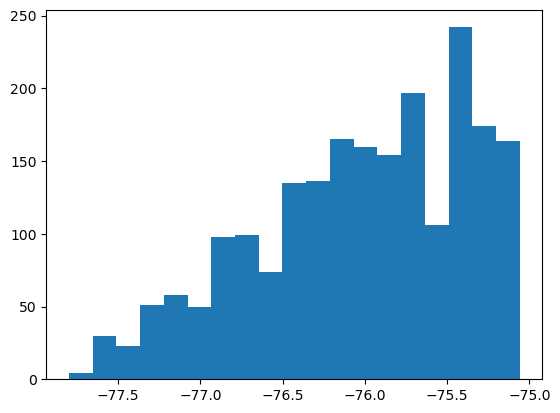

In [140]:
plt.hist(van_mass, bins = 'auto')

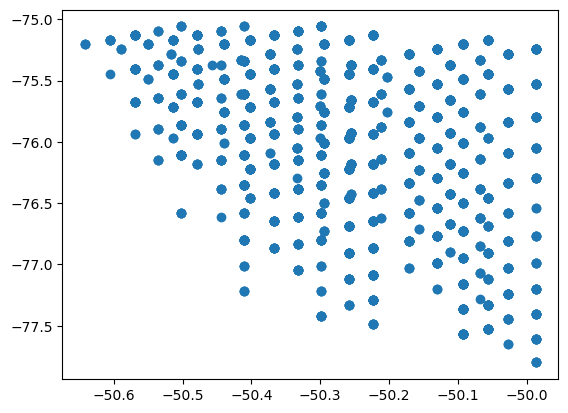

In [151]:
plt.scatter(np.log(Massrate_reimer), van_mass)